# Example with keras and TensorFlow

## Import necesary libraries

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
 
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint


## Load images for training and dev
For using tensorflow.feras.preprocessing.image.ImageDataGenerator.flow_from_directory() the images must be in a folder with one subfolder for each class. Example:

train_images/
            
            +      
            +class_1/
            +       image_1.jpg
            +       image_2.jpg
            +class_2/
                    image_3.jpg
                    image_4.jpg
  

In [2]:
train_generator = ImageDataGenerator()
test_generator = ImageDataGenerator()
train_images = train_generator.flow_from_directory(directory='images/convolution_tests/train', target_size=(64, 64))
test_images = test_generator.flow_from_directory(directory='images/convolution_tests/test', target_size=(64, 64))
print(train_images[0][0].shape)
print(train_images[0][1].shape)
print(test_images[0][0].shape)
print(test_images[0][1].shape)

Found 4 images belonging to 2 classes.
Found 3 images belonging to 2 classes.
(4, 64, 64, 3)
(4, 2)
(3, 64, 64, 3)
(3, 2)


## Show some of our images

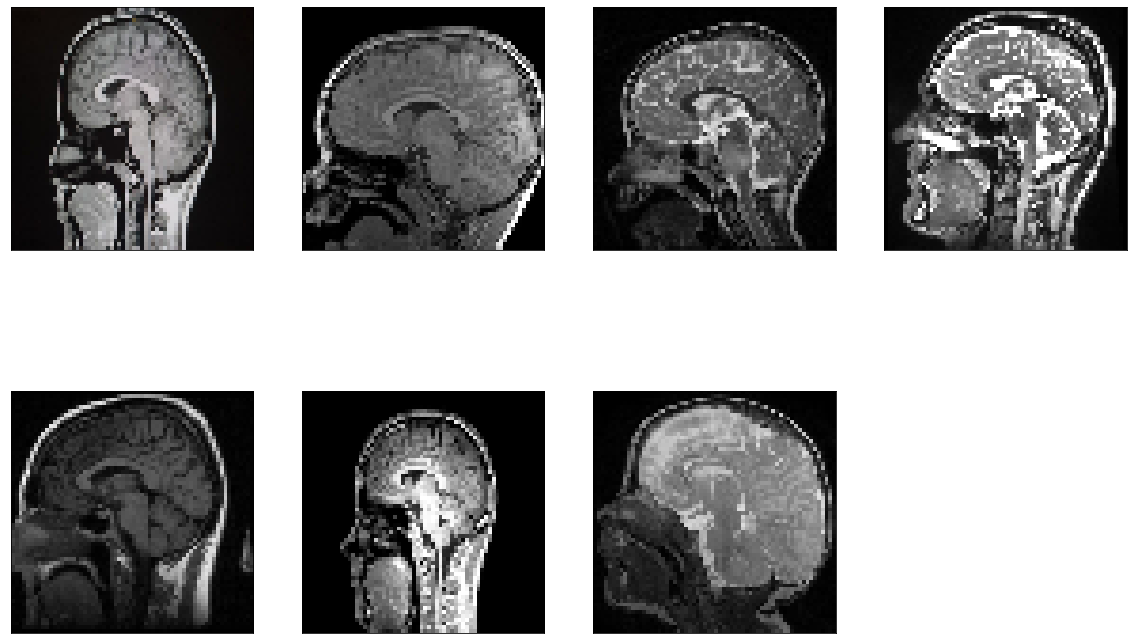

In [3]:
from tensorflow.keras.preprocessing import image
#img_tensor = image.img_to_array(train_images[0][0][0])
#plt.imshow((train_images[0][0][1]).astype(np.uint8))
#plt.
plt.figure(figsize=(20, 20))
ln = train_images[0][0].shape[0] + test_images[0][0].shape[0]
all_images = [img for img in train_images[0][0]] + [img2 for img2 in test_images[0][0]]
for i in range(ln):
    plt.subplot(3, 4, i+1, autoscale_on=True)
    
    plt.xticks([])
    plt.yticks([])
    plt.imshow((all_images[i]).astype(np.uint8))

plt.show()

## Build our model

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), padding='same',
                 input_shape=train_images[0][0].shape[1:]))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(16, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(32, (3, 3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32))
model.add(layers.Activation('softmax'))

model.summary()

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 64, 64, 8)         224       
_________________________________________________________________
activation_12 (Activation)   (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 16)        1168      
_________________________________________________________________
activation_13 (Activation)   (None, 30, 30, 16)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 32)       

## Attempt to use checkpoints so later we don't need to train again our model

In [9]:
checkpointer = ModelCheckpoint(filepath="trained_models/convolution_tests/best_weights.hdf5", monitor = 'val_accuracy', verbose=1, save_best_only=True)

## Finally we fit our model

In [10]:
history = model.fit_generator(train_images, steps_per_epoch = 7, epochs = 10, callbacks=[checkpointer], validation_data = test_images, validation_steps = 50)

Epoch 1/10
6/7 [========================>.....] - ETA: 0s - loss: 0.6805 - accuracy: 0.5833
Epoch 00001: val_accuracy improved from -inf to 0.33333, saving model to trained_models/convolution_tests/best_weights.hdf5
7/7 [==============================] - 7s 948ms/step - loss: 0.6793 - accuracy: 0.6071 - val_loss: 0.7180 - val_accuracy: 0.3333
Epoch 2/10
6/7 [========================>.....] - ETA: 0s - loss: 0.7042 - accuracy: 0.3750
Epoch 00002: val_accuracy improved from 0.33333 to 0.66667, saving model to trained_models/convolution_tests/best_weights.hdf5
7/7 [==============================] - 7s 942ms/step - loss: 0.6981 - accuracy: 0.4286 - val_loss: 0.6762 - val_accuracy: 0.6667
Epoch 3/10
6/7 [========================>.....] - ETA: 0s - loss: 0.7028 - accuracy: 0.4583
Epoch 00003: val_accuracy did not improve from 0.66667
7/7 [==============================] - 7s 940ms/step - loss: 0.7001 - accuracy: 0.4643 - val_loss: 0.6842 - val_accuracy: 0.6667
Epoch 4/10
6/7 [===============

In [7]:
model.load_weights('trained_models/convolution_tests/best_weights.hdf5')

In [11]:
model.save('trained_models/convolution_tests/brain_cnn.h5')

## Let's show our single test image

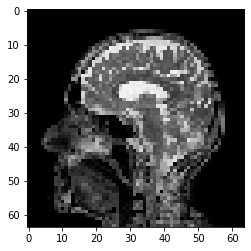

In [12]:
img = load_img('images/convolution_tests/test.jpg', target_size=(64, 64))
plt.imshow(img)
plt.show()

In [13]:
# predicting images
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
print("Predicted class is:",classes)

Predicted class is: [0]


In [18]:
layer_outputs = [layer.output for layer in model.layers[:12]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [19]:
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
activations = activation_model.predict(img_tensor) 
# Returns a list of five Numpy arrays: one array per layer activation

(1, 64, 64, 8)


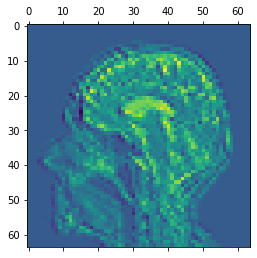

In [20]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

C:\Users\StarDust\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


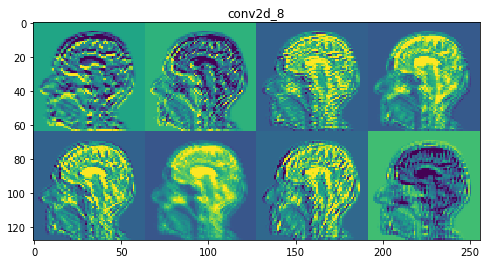

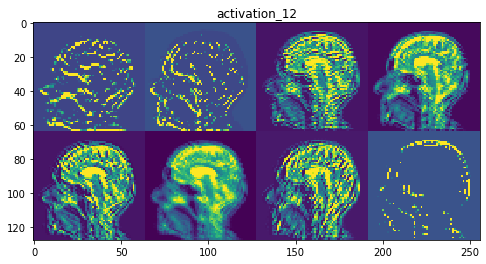

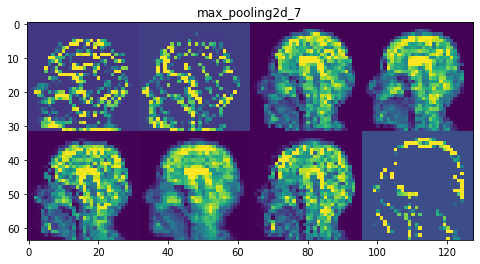

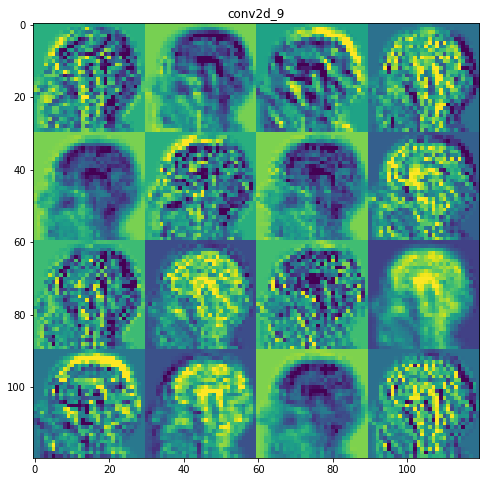

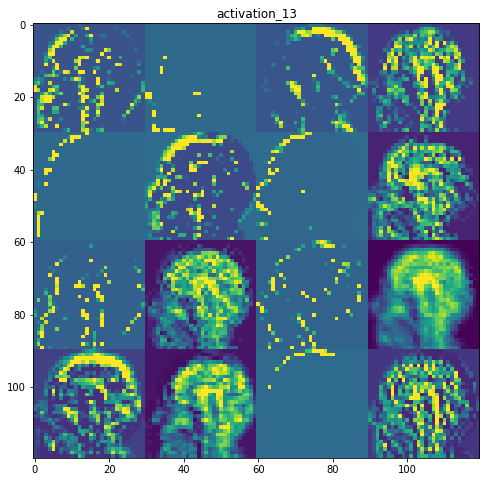

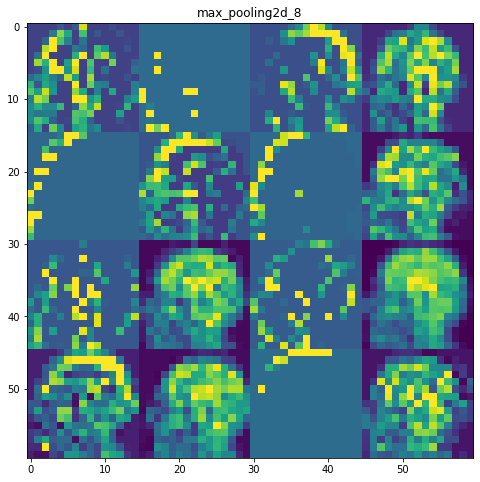

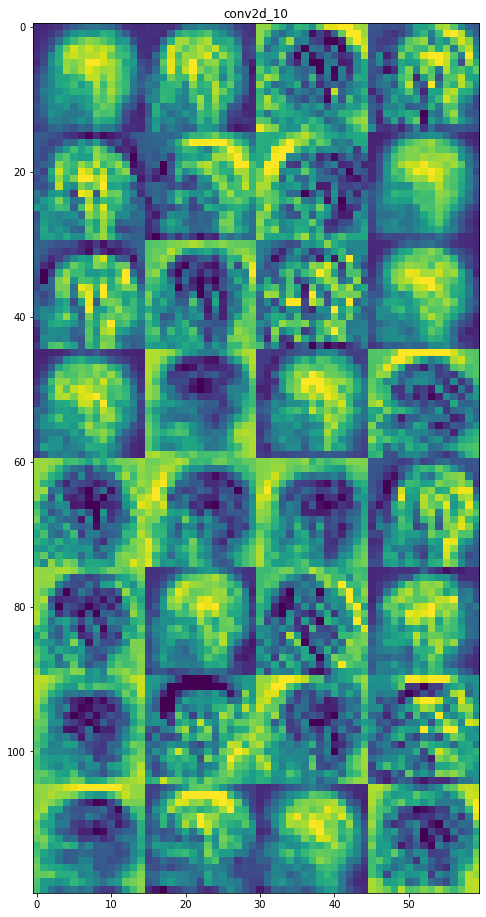

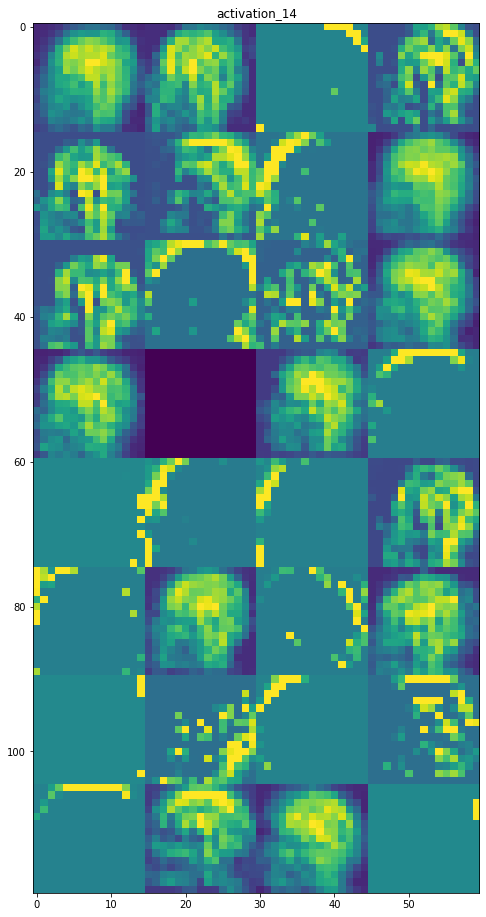

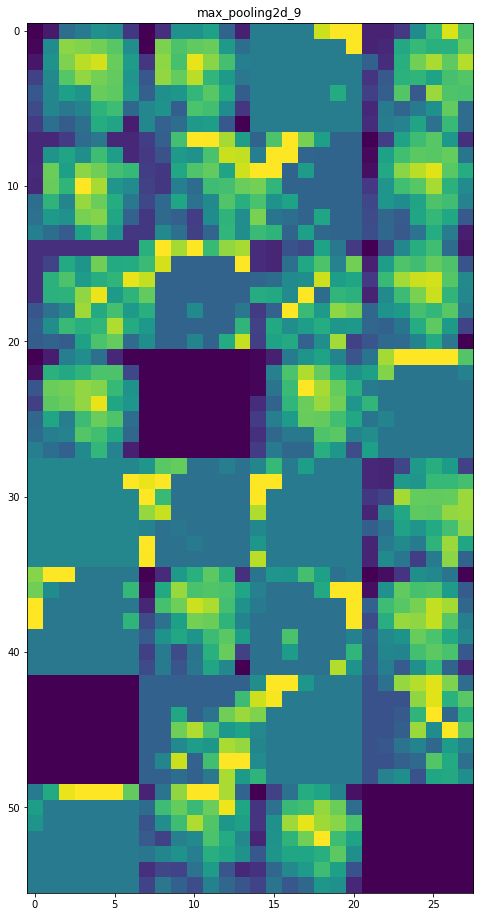

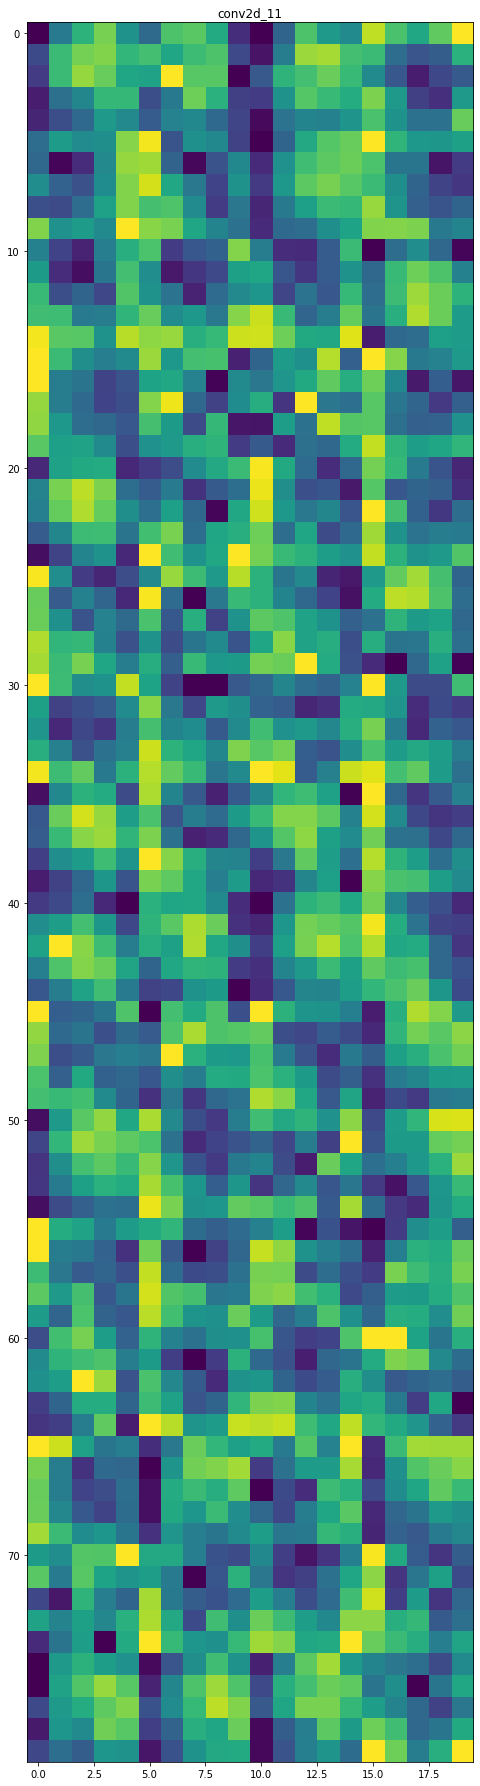

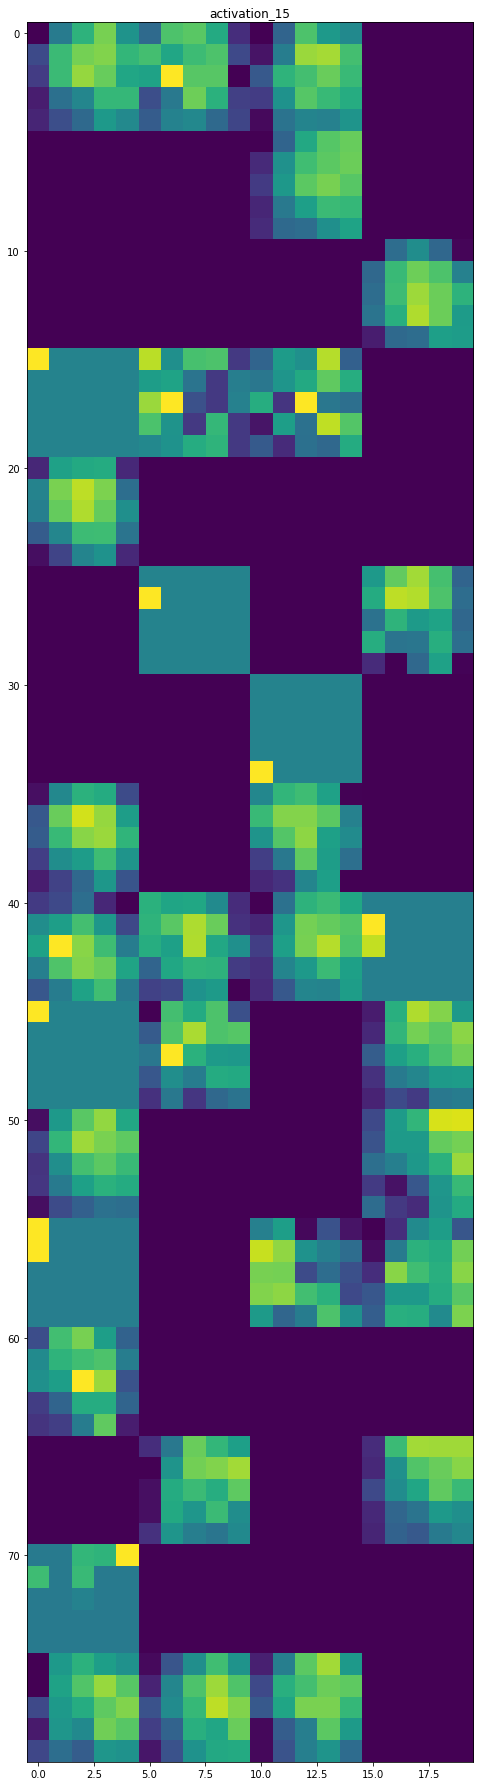

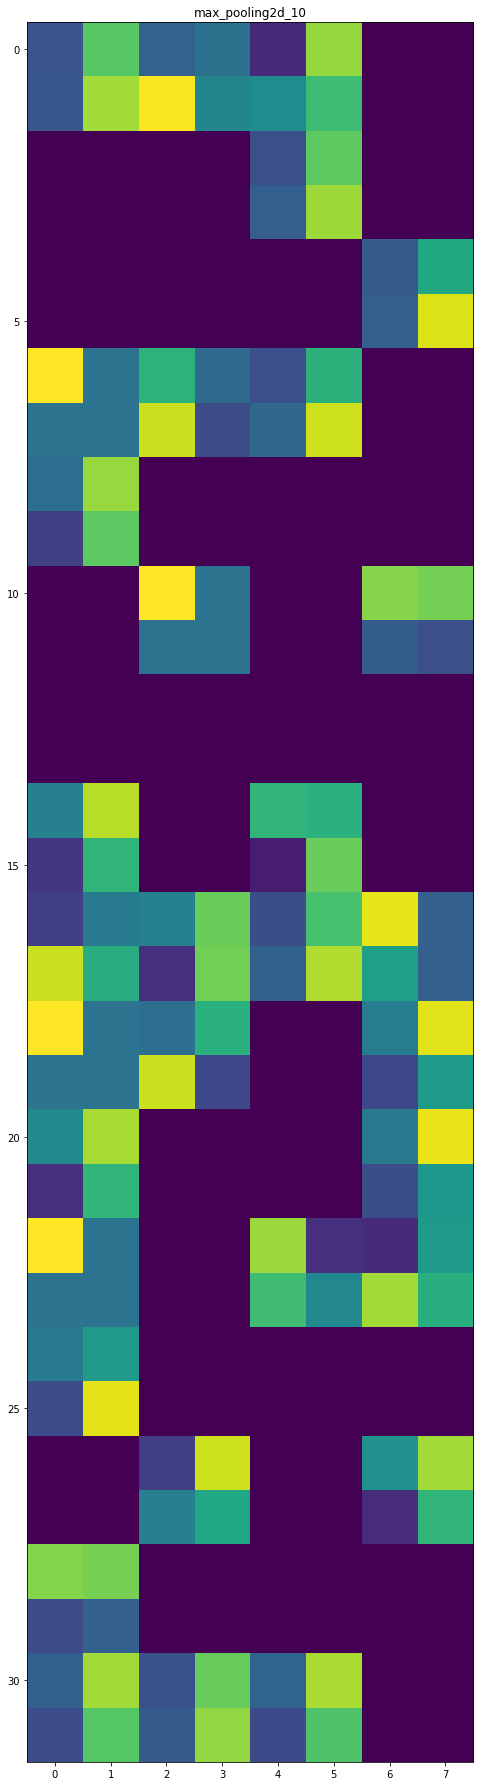

In [22]:
layer_names = []
for layer in model.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 4

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 2. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')